Predicting Air Quality Index using Machine Learning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [ ]:
df = pd.read_csv("city_day.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df_cleaned = df.drop_duplicates()
df_cleaned

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.head()
df.sort_index()


,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [ ]:
# Show null values in the DataFrame
null_values = df.isnull()
print(null_values)

        City   Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      False  False   True   True  False  False  False   True  False  False   
1      False  False   True   True  False  False  False   True  False  False   
2      False  False   True   True  False  False  False   True  False  False   
3      False  False   True   True  False  False  False   True  False  False   
4      False  False   True   True  False  False  False   True  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  False  False  False  False  False  False  False  False  False  False   
29527  False  False  False  False  False  False  False  False  False  False   
29528  False  False  False  False  False  False  False  False  False  False   
29529  False  False  False  False  False  False  False  False  False  False   
29530  False  False  False  False  False  False  False  False  False  False   

          O3  Benzene  Toluene  Xylene    AQI  AQI_

In [ ]:
# Count the number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.sort_values(by = 'Date')

In [ ]:
df['Date'].min() , df['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

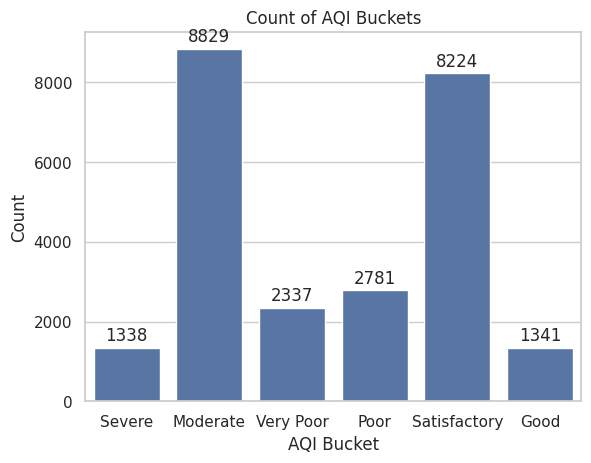

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame df_city_day with AQI_Bucket column
# Example countplot
sns.set(style="whitegrid")
ax = sns.countplot(x=df["AQI_Bucket"])

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Set plot title and labels
plt.title("Count of AQI Buckets")
plt.xlabel("AQI Bucket")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
#We delete AQI_Bucket from the dataset because it is not a feature that affects air quality.

df = df.drop(["AQI_Bucket"],axis=1)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3072,Amaravati,2020-07-01,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
26956,Talcher,2020-07-01,24.85,31.06,27.73,29.36,57.09,1.37,1.52,14.42,14.90,0.00,NaN,NaN,101.0
28068,Thiruvananthapuram,2020-07-01,2.00,35.00,1.68,2.30,2.58,5.62,0.42,6.15,22.10,NaN,NaN,NaN,41.0
7833,Chandigarh,2020-07-01,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0


In [ ]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN
21855,Mumbai,2015-01-01,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/19DF2fna9rkSpP3kaNlTM6JtIzQDPE2TLx2PEPrsDaLA#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


<Axes: >

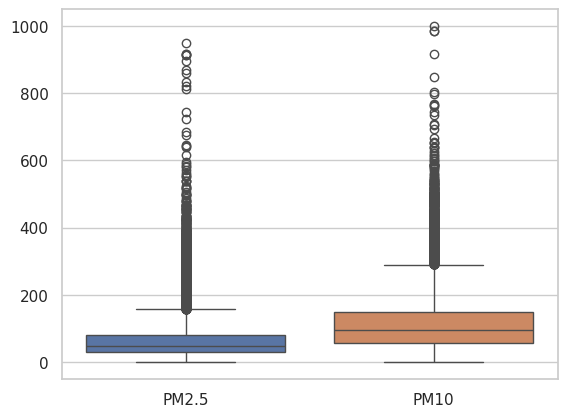

In [ ]:
# We draw boxplots to observe outlier Data
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

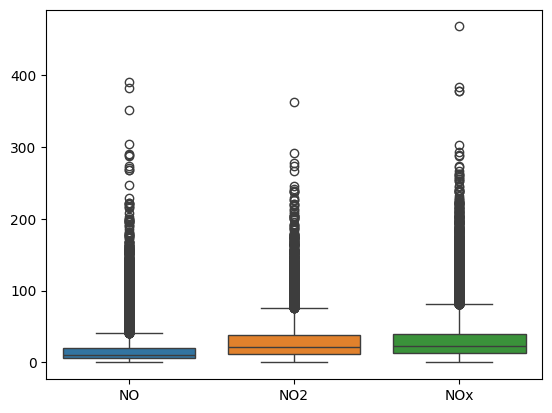

In [ ]:
sns.boxplot(data=df[['NO','NO2','NOx']])

<Axes: >

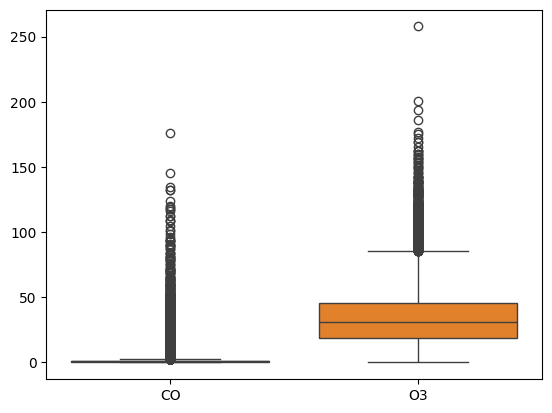

In [ ]:
sns.boxplot(data=df[['CO','O3']])


<Axes: >

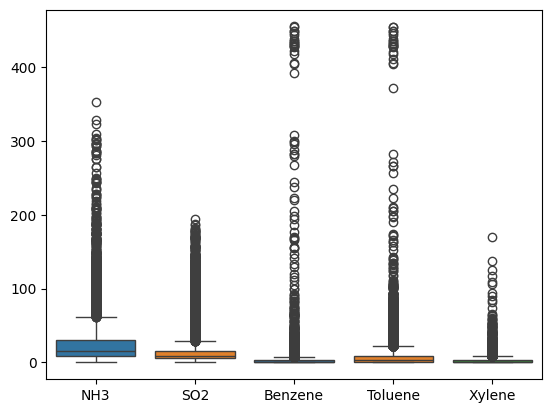

In [ ]:
sns.boxplot(data=df[['NH3','SO2']])
sns.boxplot(data=df[['Benzene','Toluene','Xylene']])

In [ ]:
def replace_outliers_with_quartiles(df):

    for column in df.select_dtypes(include=['number']).columns:

        # Used to cycle through all numeric columns in the DataFrame.

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # To identify outliers, lower and upper limits are calculated and values ​​
        # outside these limits are considered outliers.

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # For each column, we identify outliers and replace them with Q1 or Q3.
        # We do this using a lambda function. If the value is less than the lower bound,
        #it is replaced with Q1. If it is greater than the upper bound,
        #it is replaced with Q3.
        #In the last case, the value is not changed and remains the same.

        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )

    return df

df = replace_outliers_with_quartiles(df)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,54.975923,32.781561,0.04,28.820,48.57,80.590000,158.21
PM10,18391.0,104.818086,60.357602,0.01,56.255,95.68,149.742500,289.95
NO,25949.0,12.472491,8.941774,0.02,5.630,9.89,19.950000,41.43
NO2,25946.0,25.482607,16.698364,0.01,11.750,21.69,37.620000,76.40
NOx,25346.0,26.520383,17.876378,0.00,12.820,23.52,40.125625,81.06
NH3,19203.0,19.661227,13.838362,0.01,8.580,15.85,30.020000,62.16
CO,27472.0,0.952485,0.613460,0.00,0.510,0.89,1.450000,2.86
SO2,25677.0,10.304869,5.908036,0.01,5.670,9.16,15.220000,29.54
O3,25509.0,32.836577,17.969539,0.01,18.860,30.84,45.570000,85.63
Benzene,23908.0,1.676408,1.786750,0.00,0.120,1.07,3.080000,7.52


<Axes: >

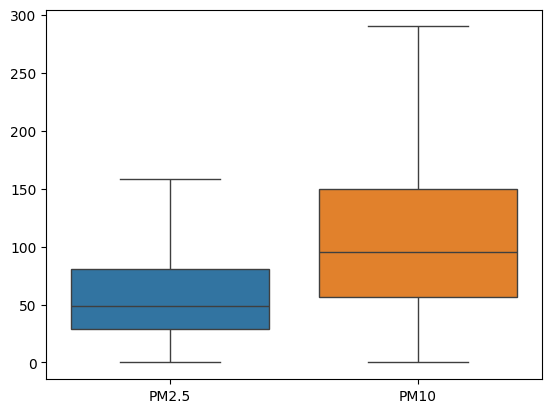

In [ ]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

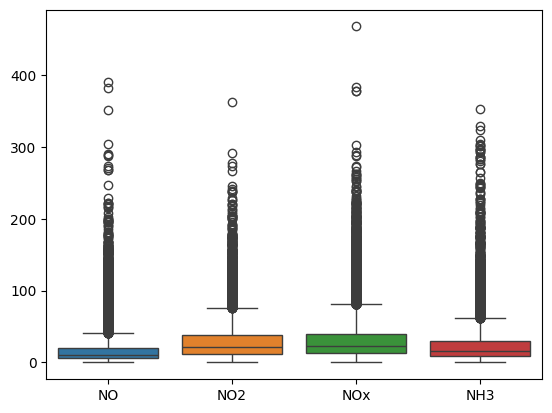

In [ ]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

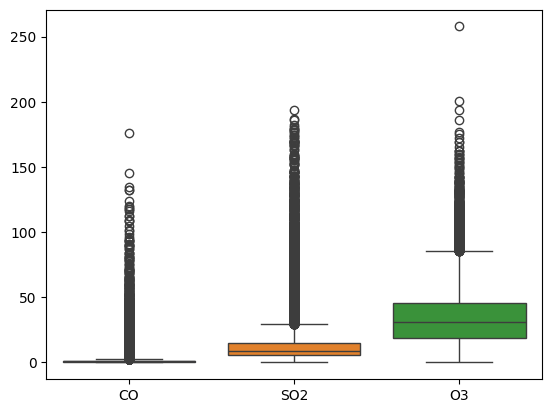

In [ ]:
sns.boxplot(data=df[['CO','SO2','O3']])

<Axes: >

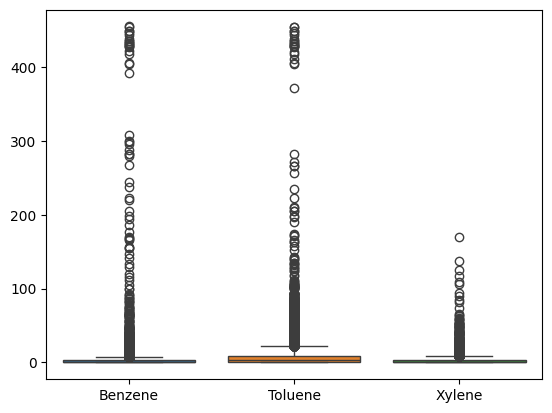

In [ ]:
sns.boxplot(data=df[['Benzene','Toluene','Xylene']])

In [ ]:
df=df.drop(columns=["City"])
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


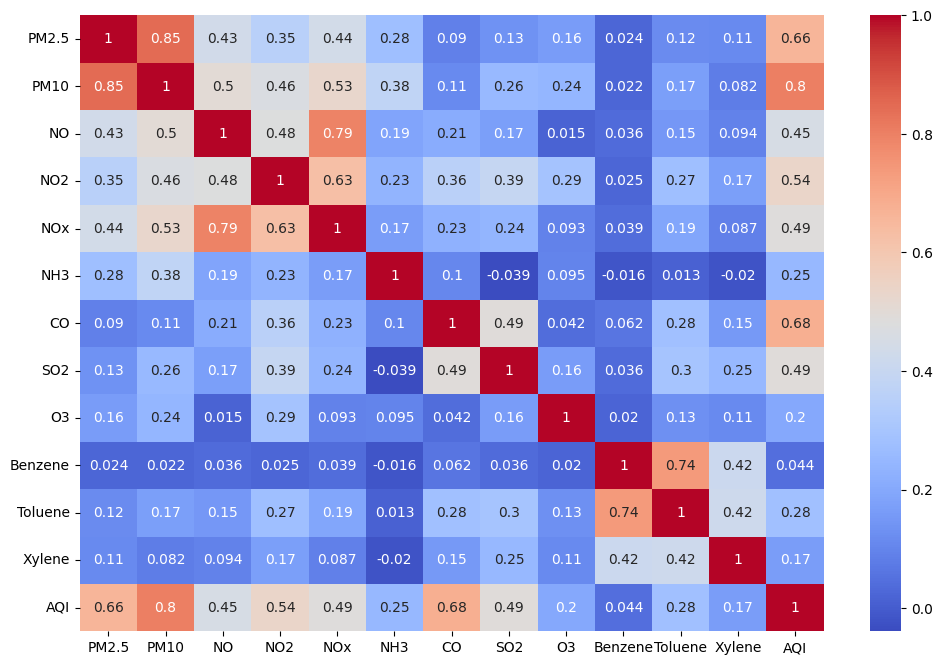

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# Count null values in each column
null_count = df.isnull().sum()
print("Null values in each column:")
print(null_count)

Null values in each column:
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load datasets
city_day = pd.read_csv('city_day.csv')
city_hour = pd.read_csv('city_hour.csv')
station_day = pd.read_csv('station_day.csv')
station_hour = pd.read_csv('station_hour.csv')
stations = pd.read_csv('stations.csv')

# Selecting relevant features and target for modeling
data = city_day[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
data = data.dropna()  # Drop rows with missing values

# Define features (X) and target (y)
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
adaboost_reg = AdaBoostRegressor(n_estimators=100, random_state=42)

# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model evaluation function
def evaluate_model(model):
    # Cross-validation on training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2, np.mean(np.sqrt(-cv_scores))  # RMSE for cross-validation

# Evaluate Linear Regression
mae_lr, rmse_lr, r2_lr, cv_rmse_lr = evaluate_model(linear_reg)
print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}, CV RMSE: {cv_rmse_lr:.2f}")

# Evaluate AdaBoost Regressor
mae_ab, rmse_ab, r2_ab, cv_rmse_ab = evaluate_model(adaboost_reg)
print(f"AdaBoost Regressor - MAE: {mae_ab:.2f}, RMSE: {rmse_ab:.2f}, R²: {r2_ab:.2f}, CV RMSE: {cv_rmse_ab:.2f}")


<ipython-input-25-4a33c5e75fff>:13: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv('station_hour.csv')


Linear Regression - MAE: 18.15, RMSE: 25.52, R²: 0.92, CV RMSE: 28.23
AdaBoost Regressor - MAE: 38.81, RMSE: 43.78, R²: 0.77, CV RMSE: 42.57


In [ ]:
from sklearn.metrics import explained_variance_score

# Re-train and calculate accuracy for Linear Regression
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
accuracy_lr = r2_score(y_test, y_pred_lr) * 100  # Convert to percentage
explained_variance_lr = explained_variance_score(y_test, y_pred_lr) * 100

print(f"Linear Regression - Accuracy (R²): {accuracy_lr:.2f}%, Explained Variance: {explained_variance_lr:.2f}%")

# Re-train and calculate accuracy for AdaBoost Regressor
adaboost_reg.fit(X_train, y_train)
y_pred_ab = adaboost_reg.predict(X_test)
accuracy_ab = r2_score(y_test, y_pred_ab) * 100  # Convert to percentage
explained_variance_ab = explained_variance_score(y_test, y_pred_ab) * 100

print(f"AdaBoost Regressor - Accuracy (R²): {accuracy_ab:.2f}%, Explained Variance: {explained_variance_ab:.2f}%")


Linear Regression - Accuracy (R²): 92.17%, Explained Variance: 92.17%
AdaBoost Regressor - Accuracy (R²): 76.96%, Explained Variance: 88.99%


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load datasets
city_day = pd.read_csv('city_day.csv')
city_hour = pd.read_csv('city_hour.csv')
station_day = pd.read_csv('station_day.csv')
station_hour = pd.read_csv('station_hour.csv')
stations = pd.read_csv('stations.csv')

# Selecting relevant features and target for modeling from city_day
data = city_day[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
data = data.dropna()  # Drop rows with missing values

# Define features (X) and target (y)
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
adaboost_reg = AdaBoostRegressor(n_estimators=100, random_state=42)

# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model evaluation function
def evaluate_model(model):
    # Cross-validation on training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Calculate "accuracy" based on R²
    accuracy = r2 * 100  # Convert R² to percentage

    return mae, rmse, r2, accuracy, np.mean(np.sqrt(-cv_scores))  # CV RMSE

# Evaluate Linear Regression
mae_lr, rmse_lr, r2_lr, accuracy_lr, cv_rmse_lr = evaluate_model(linear_reg)
print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}, Accuracy: {accuracy_lr:.2f}%, CV RMSE: {cv_rmse_lr:.2f}")

# Evaluate AdaBoost Regressor
mae_ab, rmse_ab, r2_ab, accuracy_ab, cv_rmse_ab = evaluate_model(adaboost_reg)
print(f"AdaBoost Regressor - MAE: {mae_ab:.2f}, RMSE: {rmse_ab:.2f}, R²: {r2_ab:.2f}, Accuracy: {accuracy_ab:.2f}%, CV RMSE: {cv_rmse_ab:.2f}")


<ipython-input-30-d9ad43b5ecfc>:13: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv('station_hour.csv')


Linear Regression - MAE: 18.15, RMSE: 25.52, R²: 0.92, Accuracy: 92.17%, CV RMSE: 28.23
AdaBoost Regressor - MAE: 38.81, RMSE: 43.78, R²: 0.77, Accuracy: 76.96%, CV RMSE: 42.57


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv("city_day.csv")  # Replace 'city_day.csv' with the correct path if necessary

# Data Preprocessing: Fill missing values and select relevant columns
data = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]

# Fill missing values if any (use median to maintain robustness)
data.fillna(data.median(), inplace=True)

# Define features and target
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]
y = data['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
adaboost_reg = AdaBoostRegressor(n_estimators=100, random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model evaluation function
def evaluate_model(model):
    # Cross-validation on training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2, np.mean(np.sqrt(-cv_scores))  # RMSE for cross-validation

# Evaluate Linear Regression
mae_lr, rmse_lr, r2_lr, cv_rmse_lr = evaluate_model(linear_reg)
print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}, CV RMSE: {cv_rmse_lr:.2f}")

# Evaluate AdaBoost Regressor
mae_ab, rmse_ab, r2_ab, cv_rmse_ab = evaluate_model(adaboost_reg)
print(f"AdaBoost Regressor - MAE: {mae_ab:.2f}, RMSE: {rmse_ab:.2f}, R²: {r2_ab:.2f}, CV RMSE: {cv_rmse_ab:.2f}")

# Calculate accuracy for Linear Regression
accuracy_lr = r2_lr * 100  # Convert R² to percentage
print(f"Linear Regression - Accuracy (R² as %): {accuracy_lr:.2f}%")

# Calculate accuracy for AdaBoost Regressor
accuracy_ab = r2_ab * 100  # Convert R² to percentage
print(f"AdaBoost Regressor - Accuracy (R² as %): {accuracy_ab:.2f}%")


Linear Regression - MAE: 29.91, RMSE: 54.46, R²: 0.81, CV RMSE: 60.45
AdaBoost Regressor - MAE: 163.88, RMSE: 175.78, R²: -1.01, CV RMSE: 178.48
Linear Regression - Accuracy (R² as %): 80.74%
AdaBoost Regressor - Accuracy (R² as %): -100.72%
